## 1. Akshay Lathwal : E22008
## 2. Shimanshu Gera : E22030

### We are dealing with House Price Prediction Problem 

In [961]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import warnings
warnings.filterwarnings("ignore")

In [962]:
hp =pd.read_csv('housing.csv')
hp.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


1. Are there any null values? 
2. Duplicates? 
3. What does each row and column mean? 
4. How does the distribution of columns look like? 
5. Any anomolies in the data?
6. How are we dealing with these anomolies? 

In [963]:
#Checking for null 
hp.isnull().values.any()

False

In [964]:
hp.isna().sum()
#No null values 

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [965]:
hp["id"].value_counts()>1

795000620      True
251300110      True
6021501535     True
1630700361     True
1781500435     True
              ...  
4137000460    False
1175000073    False
7137960460    False
8805400010    False
1523300157    False
Name: id, Length: 9720, dtype: bool

There are duplicate IDs in the data set which means, the data set contains data about one house sold multiple times also.

In [966]:
hp.value_counts()>1

id          date             price     bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  lat      long      sqft_living15  sqft_lot15
1200019     20140508T000000  647500.0  4         1.75       2060         26036     1.0     0           0     4          8      1160        900            1947      0             98166    47.4444  -122.351  2590           21891         False
6371000079  20140714T000000  575000.0  4         2.25       2070         1230      3.0     0           0     3          9      1500        570            2013      0             98116    47.5775  -122.410  1569           4802          False
6352600210  20140611T000000  809950.0  4         2.50       3280         6181      2.0     0           0     3          10     3280        0              2001      0             98074    47.6484  -122.081  3110           7570          False
6352600650  20150402T000000  936000.0  4     

1. Each Row in the data set represents houses. However, to uniquely identify a house, id is used.
2. The data contains 9761 rows.Each row represents information about sale of a house. It has resale information about the same house as a seperate row.  

In [967]:
def graph_v2(file):
    dat=pd.read_csv(file)
    for i in dat.columns:
        if i in dat.loc[:,dat.dtypes==object] or dat[i].value_counts().count()<10: 
            #Here we are trying to get a bar plot for categorical as well as discrete numbers <10
            dat[i].value_counts().plot(kind='bar', figsize=(10,8), color='turquoise', fontsize=12, rot=0)
            plt.xlabel(i,fontsize=15)
            plt.ylabel('Frequency',fontsize=15)
            fig=plt.gcf()
            plt.show()
            fig.savefig(i+'.jpg',dpi=100)
        else:
            plt.subplot(2,1,2)
            plt.hist(dat[i],histtype='bar',bins=20,color='turquoise',edgecolor='white')
            plt.xlabel(i)
            plt.ylabel('Frequency')

            plt.subplot(2,1,1)
            plt.boxplot(dat[i], vert=False)
            plt.title(f'Distribution of {i}')
            fig1=plt.gcf()
            plt.show()
            fig1.savefig(i+'.jpg',dpi=100)

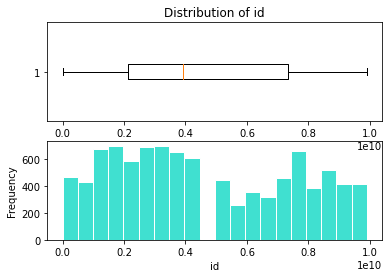

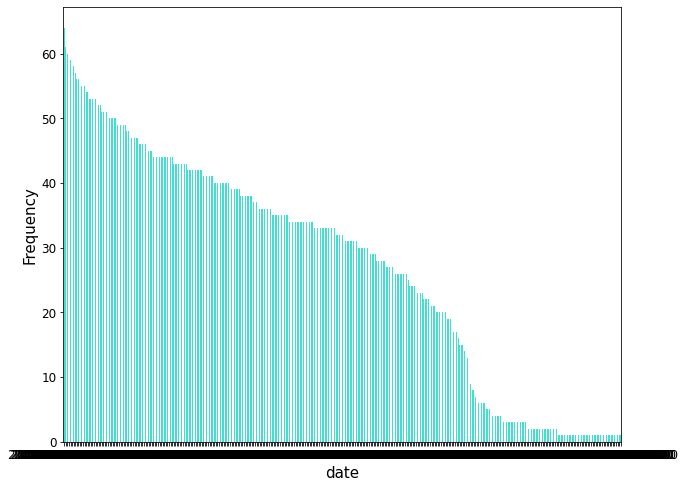

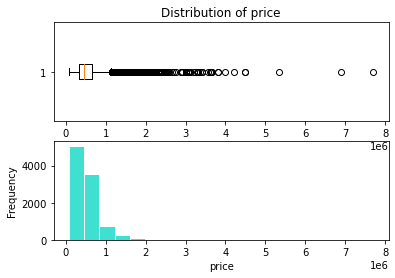

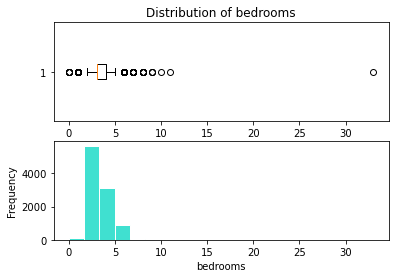

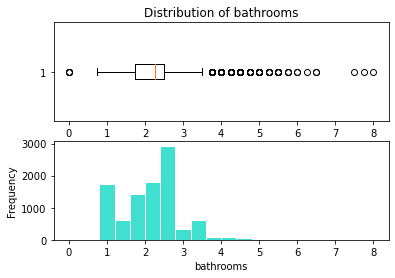

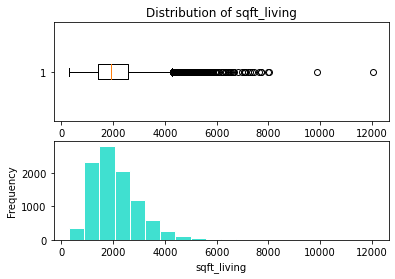

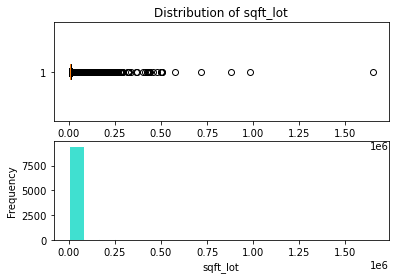

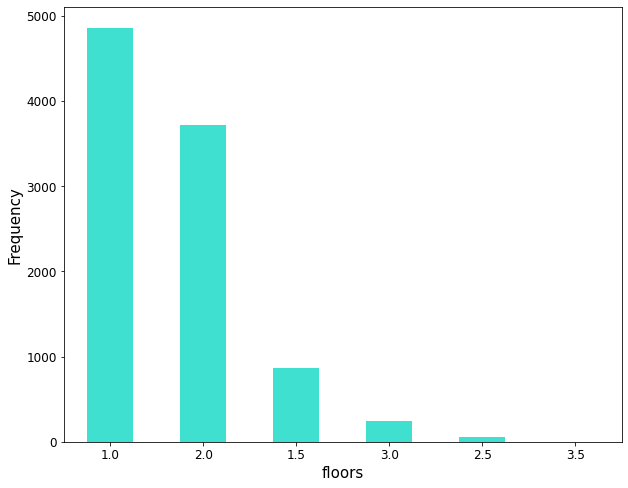

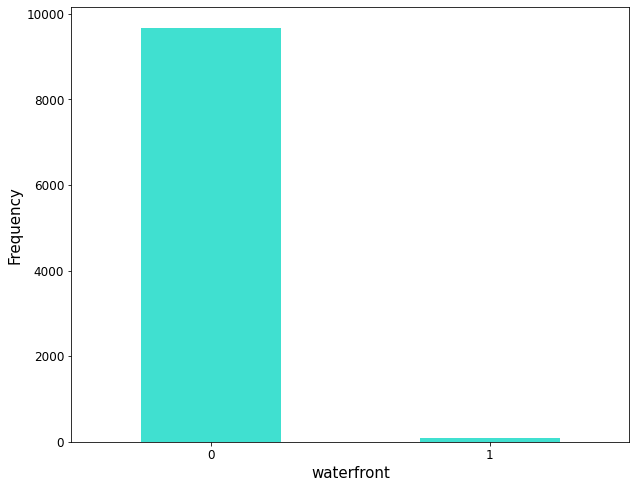

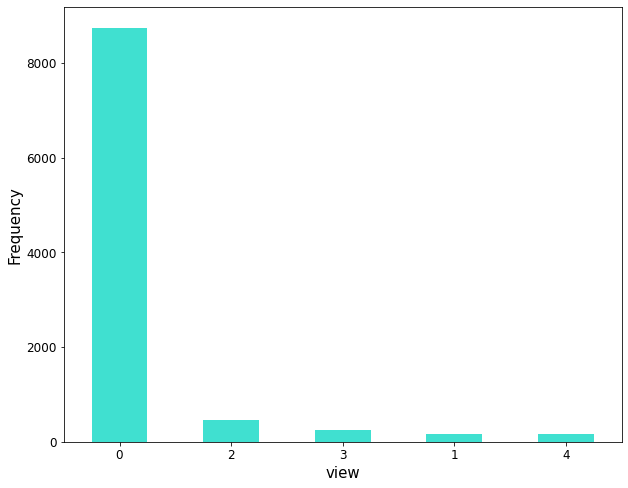

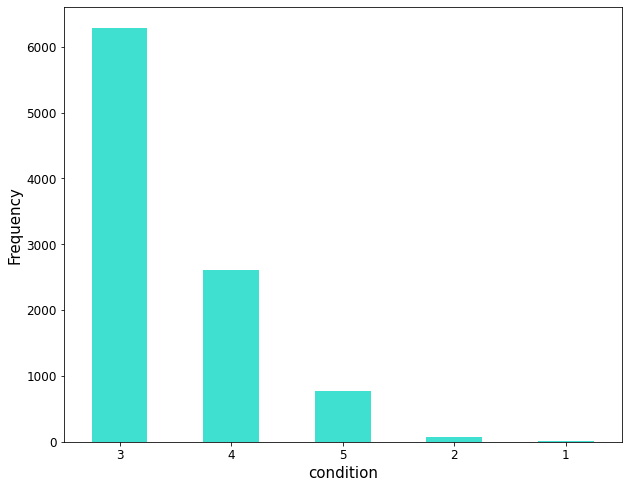

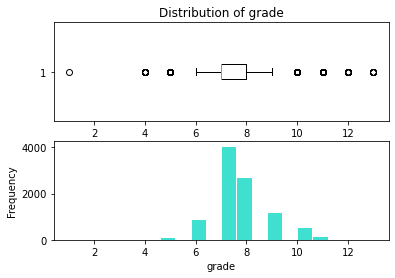

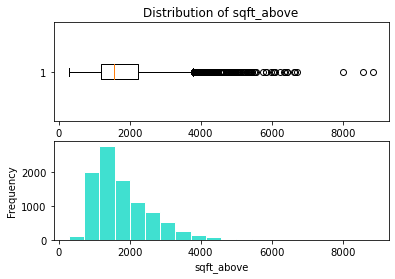

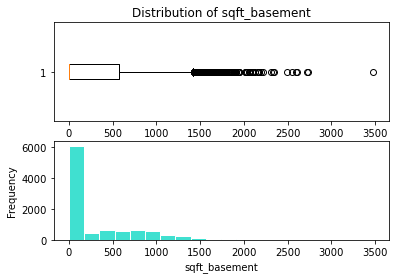

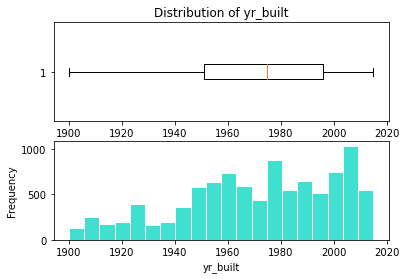

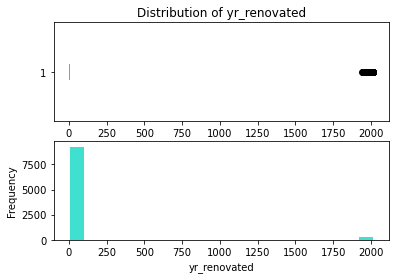

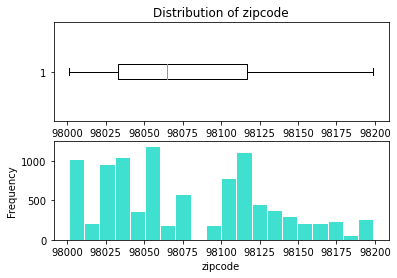

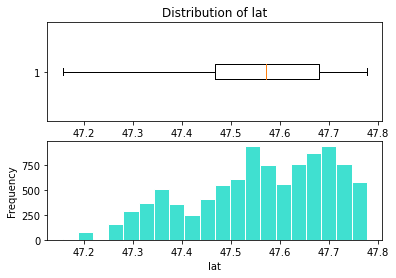

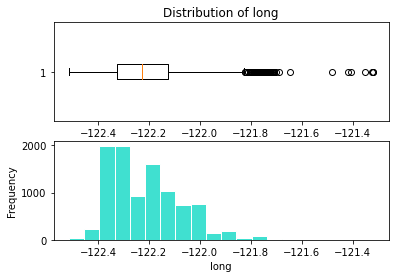

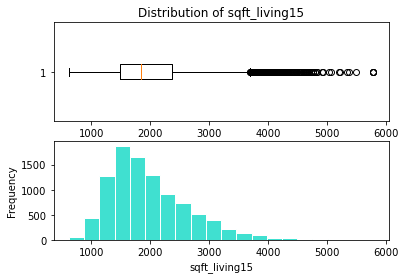

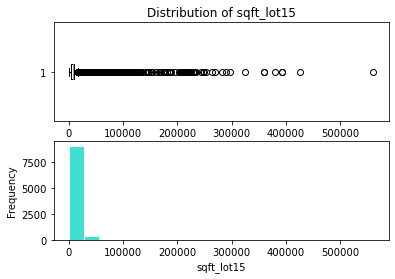

In [968]:
import os 
#os.chdir(r"C:\Users\sreek\Documents\1. Praxis\Term 1\2. IML\Final Assignment")
graph_v2("housing.csv")

Informed Imputation Merthod to edit any weird data entries that are observed eg: 33 bedroom in 1650 

In [969]:
hp.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.428336e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.797779e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


## 1. Univariate Analysis 

In [970]:
hp["bathrooms"].value_counts()

2.50    2409
1.00    1741
1.75    1431
2.25     937
2.00     871
1.50     599
2.75     525
3.50     339
3.00     335
3.25     274
3.75      72
4.00      61
4.50      47
0.75      37
4.25      33
5.00      10
4.75       9
5.50       6
1.25       5
5.25       5
0.00       4
5.75       3
6.00       2
6.50       2
8.00       1
7.50       1
7.75       1
6.25       1
Name: bathrooms, dtype: int64

In [971]:
hp[hp.bathrooms==0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3177,2954400190,20140624T000000,1300000.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
4472,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
4507,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
8840,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


1. Bathroom count zero looks weird. Checking if its an anamoly 
2. After Checking they have zero bedrooms but their grading is better and their area living is also good amount. So we are counting them as anomolies and removing from the data 

In [972]:
hp = hp[hp.bathrooms!=0]

In [973]:
hp = hp[hp.bedrooms!=33] #Here we have eliminated an anomoly 
#which has 33 bedrooms in less than 2000 sqft

In [974]:
hp[hp.floors>2]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
53,3362400431,20140626T000000,518500.0,3,3.50,1590,1102,3.0,0,0,...,8,1590,0,2010,0,98103,47.6824,-122.347,1620,3166
182,7821200390,20140806T000000,450000.0,3,2.00,1290,1213,3.0,0,0,...,8,1290,0,2001,0,98103,47.6609,-122.344,1290,3235
220,2625069070,20150410T000000,1390000.0,4,3.25,4860,181319,2.5,0,0,...,9,4860,0,1993,0,98074,47.6179,-122.005,3850,181319
302,6145600041,20140514T000000,306000.0,3,1.50,1220,1086,3.0,0,0,...,8,1220,0,2007,0,98133,47.7049,-122.353,1220,1422
303,3300701615,20140930T000000,655000.0,4,2.50,2630,4000,3.0,0,0,...,8,2630,0,2002,0,98117,47.6915,-122.381,1640,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9743,2767604724,20141015T000000,505000.0,2,2.50,1430,1201,3.0,0,0,...,8,1430,0,2009,0,98107,47.6707,-122.381,1430,1249
9744,6632300207,20150305T000000,385000.0,3,2.50,1520,1488,3.0,0,0,...,8,1520,0,2006,0,98125,47.7337,-122.309,1520,1497
9747,1931300412,20150416T000000,475000.0,3,2.25,1190,1200,3.0,0,0,...,8,1190,0,2008,0,98103,47.6542,-122.346,1180,1224
9750,1972201967,20141031T000000,520000.0,2,2.25,1530,981,3.0,0,0,...,8,1480,50,2006,0,98103,47.6533,-122.346,1530,1282


In [975]:
hp[hp.floors>3] #Only 2 with more than 3 floors 
#Found no anomoly here 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6756,8673400177,20150402T000000,525000.0,3,3.0,1730,1074,3.5,0,0,...,8,1730,0,2006,0,98107,47.6692,-122.392,1370,1185
8377,1346300150,20141020T000000,3300000.0,8,4.0,7710,11750,3.5,0,0,...,12,6090,1620,1904,0,98112,47.6263,-122.314,4210,8325


In [976]:
#Grade 
hp[hp.grade==4]
#No anomolies found here 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
213,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
499,3340401535,20141105T000000,140000.0,1,1.00,730,6890,1.0,0,0,...,4,730,0,1926,0,98055,47.4670,-122.215,1790,7969
1658,1925069006,20141203T000000,355000.0,1,0.75,530,33278,1.0,0,2,...,4,530,0,1950,0,98074,47.6412,-122.079,2830,14311
2228,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
2377,4048400185,20141022T000000,352000.0,2,0.75,760,33801,1.0,0,0,...,4,760,0,1931,0,98059,47.4703,-122.076,1100,39504
2941,7203601405,20150414T000000,217000.0,2,1.00,730,2400,1.0,0,1,...,4,730,0,1934,0,98198,47.3500,-122.322,1220,4382
3937,6730700385,20141022T000000,205000.0,3,0.75,770,7000,1.0,0,0,...,4,770,0,1942,0,98024,47.5661,-121.887,950,10500
4408,4391600065,20140814T000000,330000.0,2,0.75,520,6862,1.0,0,0,...,4,520,0,1924,1980,98010,47.3260,-122.037,1170,8756
4481,3760500240,20150512T000000,435000.0,2,0.75,750,16321,1.0,0,1,...,4,750,0,1936,0,98034,47.6985,-122.229,3020,10625
5252,4322200105,20150331T000000,229050.0,1,1.00,420,3298,1.0,0,0,...,4,420,0,1949,0,98136,47.5375,-122.391,1460,4975


In [977]:
#Living sqft above 
#No anomolies found in the rest of the data set 

### Hypothesis : 1 

1. House living area -----------------------------> More area more price 
2. Number of bedrooms more------------------------> more price  
3. Bathrooms -------------------------------------> Doesn't impact as much as the bedrooms 
4. SQFT lot more ---------------------------------> more price 
5. Age of home------------------------------------> older, cheaper 
6. Recent innovation----->atleast renovated------->not renovated (For old building) 
7. Grading ---------------------------------------> Higher, more price
8. floors ----------------------------------------> More floors more price when the sqft area is good. Also, if tower, less area ---------------> more price 
9. water front -----------------------------------> More costly 
10. view ------------------------------------------> good views -->more costly 
11. area (latitude, longitude, zipcode) -----------> good area--> good price 

In [978]:
#Correlation 
corr = hp.corr()
corr.style.background_gradient()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.005827,-0.000193,0.005768,-0.007380,-0.130296,0.007692,0.000826,0.023331,-0.015223,0.012646,-0.006273,-0.003616,0.026957,-0.024922,-0.012157,0.009261,0.034169,-0.000979,-0.137536
price,-0.005827,1.000000,0.316592,0.528402,0.704909,0.094104,0.262954,0.275038,0.399841,0.044396,0.665992,0.611299,0.322463,0.051722,0.120475,-0.055734,0.299052,0.024052,0.584675,0.077839
bedrooms,-0.000193,0.316592,1.000000,0.532433,0.594516,0.031254,0.194943,-0.007014,0.084874,0.027911,0.363192,0.492509,0.315465,0.167177,0.020046,-0.159165,-0.014469,0.129013,0.402078,0.020493
bathrooms,0.005768,0.528402,0.532433,1.000000,0.760804,0.079554,0.503304,0.061471,0.182907,-0.117148,0.662853,0.695200,0.281188,0.500919,0.044577,-0.202496,0.018310,0.219978,0.568283,0.069048
sqft_living,-0.007380,0.704909,0.594516,0.760804,1.000000,0.162811,0.366058,0.097271,0.285944,-0.048459,0.764836,0.878840,0.435496,0.322720,0.043662,-0.203939,0.054685,0.240799,0.757873,0.163465
sqft_lot,-0.130296,0.094104,0.031254,0.079554,0.162811,1.000000,-0.003540,0.029419,0.099219,-0.008631,0.115825,0.180975,-0.000585,0.054049,0.001215,-0.126090,-0.092284,0.224692,0.145270,0.719922
floors,0.007692,0.262954,0.194943,0.503304,0.366058,-0.003540,1.000000,0.022458,0.031980,-0.265666,0.461822,0.534763,-0.242562,0.481777,0.013682,-0.064395,0.044966,0.134549,0.289117,-0.013310
waterfront,0.000826,0.275038,-0.007014,0.061471,0.097271,0.029419,0.022458,1.000000,0.402721,0.024026,0.088221,0.064368,0.082204,-0.027003,0.101676,0.023639,-0.009410,-0.039204,0.097312,0.028506
view,0.023331,0.399841,0.084874,0.182907,0.285944,0.099219,0.031980,0.402721,1.000000,0.059932,0.258648,0.170489,0.276994,-0.056334,0.109719,0.075776,0.005508,-0.074507,0.292798,0.079927
condition,-0.015223,0.044396,0.027911,-0.117148,-0.048459,-0.008631,-0.265666,0.024026,0.059932,1.000000,-0.135558,-0.154216,0.189509,-0.357579,-0.055655,0.002807,-0.017987,-0.105342,-0.080333,0.002505


In [979]:
# We see that price and sqft_living has very high correlation as  expected. 
#However, Waterfront though we thought it will have more impact, it doesnt look like that. 

### Bivariate Analysis

In [980]:
hp.corr()['price'].sort_values()

zipcode         -0.055734
id              -0.005827
long             0.024052
condition        0.044396
yr_built         0.051722
sqft_lot15       0.077839
sqft_lot         0.094104
yr_renovated     0.120475
floors           0.262954
waterfront       0.275038
lat              0.299052
bedrooms         0.316592
sqft_basement    0.322463
view             0.399841
bathrooms        0.528402
sqft_living15    0.584675
sqft_above       0.611299
grade            0.665992
sqft_living      0.704909
price            1.000000
Name: price, dtype: float64

Counter intutive findings: 
## We assumed these will have more correlation with price but they don't seem to have 
-------------------------------------------------------------
1. Condition of the house 
2. yr_built  
3. (sqft_lot15,sqft_lot)= Lot area 
4. year renovated 
-------------------------------------------------------------
We thought they will have impact. 
## There is a moderate correlation observed: 
-------------------------------------------------------------
1. floors           
2. waterfront       
3. bedrooms         
4. sqft_basement    
5. view 
--------------------------------------------------------------
##  High correlation is observed here : 
--------------------------------------------------------------
1. bathrooms        
2. (sqft_living15,sqft_living) = Sqft living   
3. sqft_above       
4. grade            
--------------------------------------------------------------

#Interesting Observations: 
1. Number of Bedrooms seem to have less impact on price than better bathrooms 
2. Than the number of floors, Area(sqft_above)above seems to impact the price of the building more. 
3. Year built doesn't have much  impact on the price of the building, which is surprising. We think we need to look at the age of the building. Same with year renovated.  

In [981]:
# We are continuing with Bivariate Analysis 

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

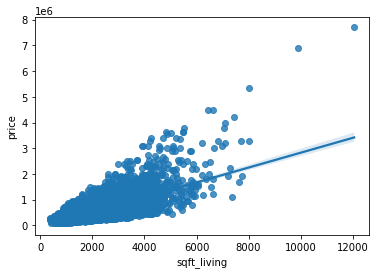

In [982]:
#We saw that it has a high correlation(linear) with price (0.5,0.7)
sns.regplot(x='sqft_living', y='price', data=hp)
#The scatter plot is proving that
# With increase in living area the price of the house seems to increase 

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

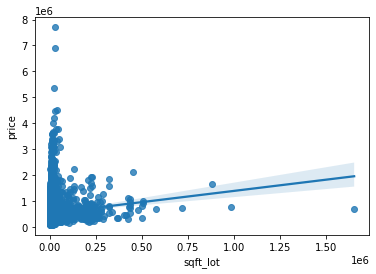

In [983]:
#We did not see much correlation between lot area and price of the house 
# Here in the scatter plot also, the price seems to be high for the houses with less lot area also. 
# This means the value of the house is more dependent on the factors with high correlation (as observed above)
# Have to perform multivariat analysis and check this 
sns.regplot(x='sqft_lot', y='price', data=hp)

<AxesSubplot:xlabel='price', ylabel='bedrooms'>

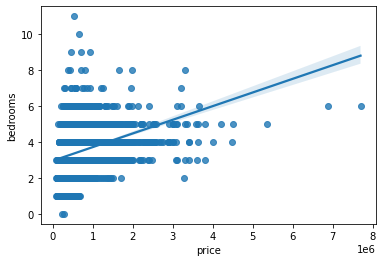

In [984]:
sns.regplot(x='price', y='bedrooms', data=hp)
#For the same number of bedrooms we see the price varies drastically 
# However,there is a trend that, with increase in the number of bedrooms, price is increasing 

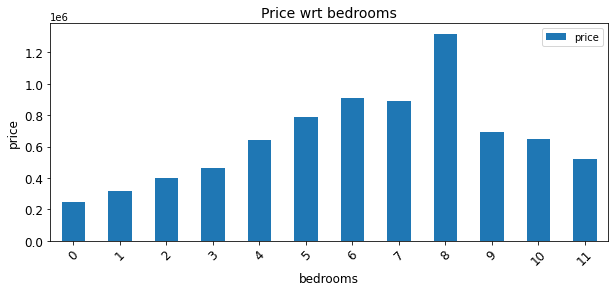

In [985]:
hp[['bedrooms','price']].groupby(['bedrooms']).mean().plot(kind='bar', figsize=(10,4), fontsize=12,rot=45)
plt.xlabel('bedrooms',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt bedrooms',fontsize=14)
plt.show()
#We see that 6 bedrooms house is priced slightly more than 7 bedroom house - Just an insight 

In [986]:
#8 bedroom house highest price, infact very high than the 9,10,11 bedroom houses. 
#This means that there must be some preferred number of bedrooms in luxurious homes among buyers. 

<AxesSubplot:xlabel='price', ylabel='floors'>

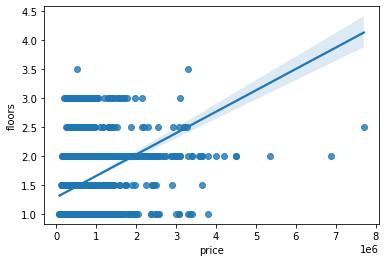

In [987]:
sns.regplot(x='price', y='floors', data=hp)
#Number of floors follow a similar trend like bedrooms 

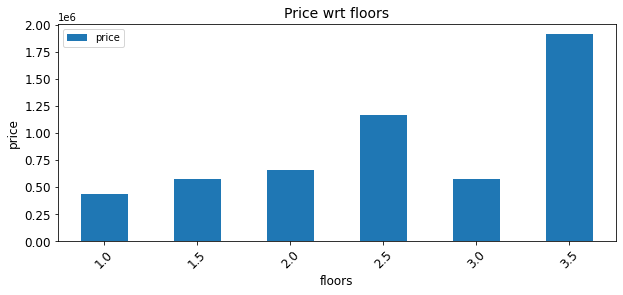

In [988]:
hp[['floors','price']].groupby(['floors']).mean().plot(kind='bar', figsize=(10,4), fontsize=12,rot=45)
plt.xlabel('floors',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt floors',fontsize=14)
plt.show()
#Highest for more floors 
#In correlation we saw that it is not very strong, around 0.3, may be because of the
#sudden rise and dip at 2.5,3. 
#Here, at 3 price is not low but is similar to 2 floors because of other factors. Maybe. 
#We have to see that 

<AxesSubplot:xlabel='price', ylabel='condition'>

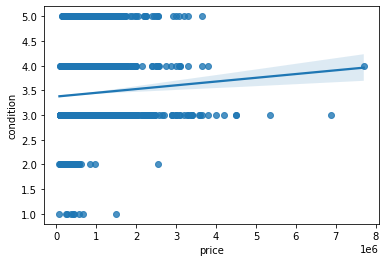

In [989]:
sns.regplot(x='price', y='condition', data=hp)
#The trend seems to be good condition good price. 

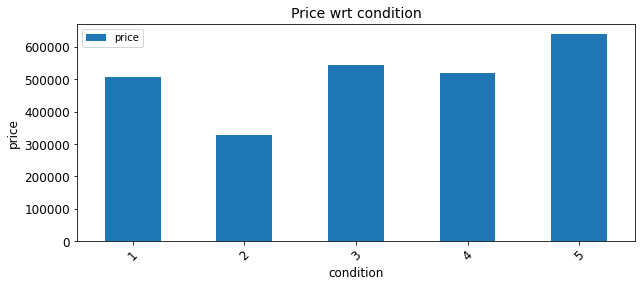

In [990]:
hp[['condition','price']].groupby(['condition']).mean().plot(kind='bar', figsize=(10,4), fontsize=12,rot=45)
plt.xlabel('condition',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt condition',fontsize=14)
plt.show()
#condition-0.044372
#So what is saw in correlation is disproved here. Condition has a good impact on price of the house 

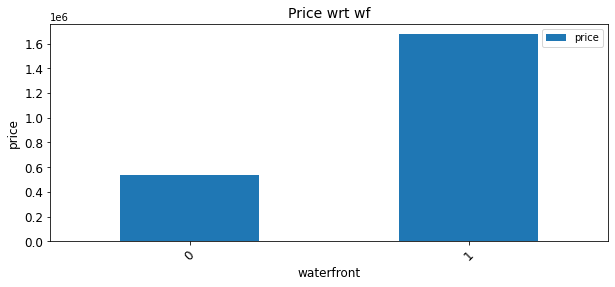

In [991]:
hp[['waterfront','price']].groupby(['waterfront']).mean().plot(kind='bar', figsize=(10,4), fontsize=12,rot=45)
plt.xlabel('waterfront',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt wf',fontsize=14)
plt.show()
#It is clear that price is more for houses with waterfront 

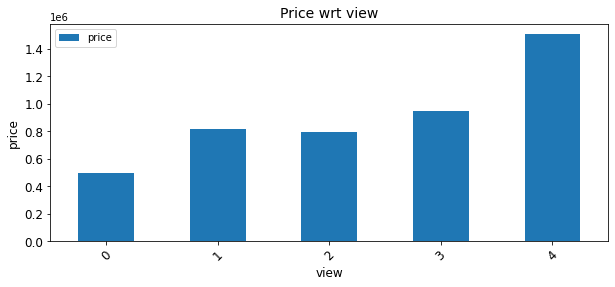

In [992]:
hp[['view','price']].groupby(['view']).mean().plot(kind='bar', figsize=(10,4), fontsize=12,rot=45)
plt.xlabel('view',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt view',fontsize=14)
plt.show()
#Good view good price 

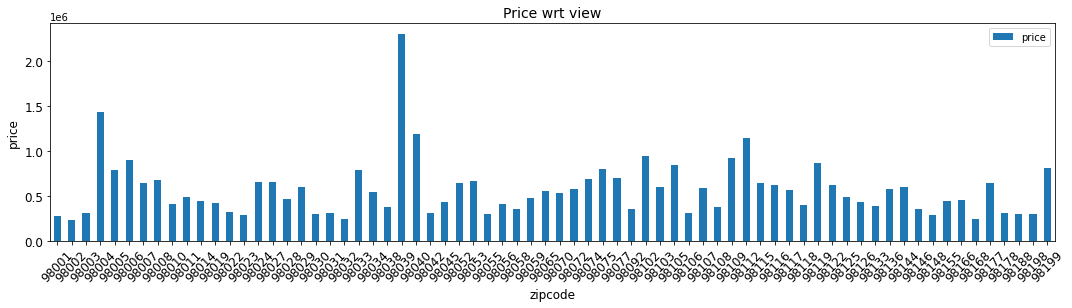

In [993]:
hp[['zipcode','price']].groupby(['zipcode']).mean().plot(kind='bar', figsize=(18,4), fontsize=12,rot=45)
plt.xlabel('zipcode',fontsize=12)
plt.ylabel('price',fontsize=12)
plt.title('Price wrt view',fontsize=14)
plt.show()
# 2-3 zipcodes have very high prices 

## Hypothesis 2

From above analysis, 
1. Living area including sqft area above, grade,bathrooms and location will 
heavily impact price of the house. 
2. Age of the house should be highly important in predicting its price.
However,we need to change the feature 'Year built' to 'Age of the house' and study further.    
3. Over and above this, if other features like number of bedrooms, lot area,
view, waterfront etc., will raise the the price of the house.

## Experiment - 1 

### Model 1 

We are considering only 

1. Bedrooms 
2. Bathrooms 
3. areas 
4. waterfront
5. view 
6. grade

for our decision tree model as we have observed in the above analysis that 
other factors have a lesser impact on price prediction
Haven't considered location features here because their 
interpretability is very less. We will convert these features in 
model improvement going forward. 

## Linear Regression
### LR-Model-1

In [994]:
Y = hp["price"]
X = hp[["bedrooms","bathrooms","sqft_living","waterfront","view","grade",
           "sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]

In [995]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('price ~ bedrooms+bathrooms+sqft_living+waterfront+view+grade+sqft_above+sqft_basement+sqft_living15+sqft_lot15', data=pd.concat([X,Y],axis=1), return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,83.906753,Intercept
1,1.691421,bedrooms
2,2.602678,bathrooms
3,inf,sqft_living
4,1.197693,waterfront
5,1.380783,view
6,3.093602,grade
7,inf,sqft_above
8,inf,sqft_basement
9,2.758762,sqft_living15


In [996]:
X=X.drop(['sqft_living'],axis=1)
X

,Intercept,bedrooms,bathrooms,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,1.0,4.0,3.00,0.0,0.0,7.0,1050.0,910.0,1360.0,5000.0
1,1.0,4.0,4.50,0.0,0.0,11.0,3890.0,1530.0,4760.0,101930.0
2,1.0,2.0,1.00,0.0,0.0,7.0,860.0,300.0,1330.0,6000.0
3,1.0,3.0,1.00,0.0,0.0,7.0,1430.0,0.0,1780.0,12697.0
4,1.0,3.0,1.75,0.0,0.0,7.0,1370.0,0.0,1370.0,10208.0
...,...,...,...,...,...,...,...,...,...,...
9756,1.0,3.0,2.00,0.0,0.0,8.0,1490.0,0.0,1400.0,1230.0
9757,1.0,4.0,2.50,0.0,0.0,9.0,2520.0,0.0,2520.0,6023.0
9758,1.0,4.0,3.50,0.0,0.0,9.0,2600.0,910.0,2050.0,6200.0
9759,1.0,2.0,0.75,0.0,0.0,7.0,1020.0,0.0,1020.0,2007.0


In [997]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('price ~ bedrooms+bathrooms+waterfront+view+grade+sqft_above+sqft_basement+sqft_living15+sqft_lot15', data=pd.concat([X,Y],axis=1), return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,83.906753,Intercept
1,1.691421,bedrooms
2,2.602678,bathrooms
3,1.197693,waterfront
4,1.380783,view
5,3.093602,grade
6,4.741568,sqft_above
7,1.684447,sqft_basement
8,2.758762,sqft_living15
9,1.061586,sqft_lot15


In [998]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25, random_state=50)
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1235.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:33:49   Log-Likelihood:            -1.0110e+05
No. Observations:                7317   AIC:                         2.022e+05
Df Residuals:                    7307   BIC:                         2.023e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.277e+05   2.58e+04    -16.569      0.000   -4.78e+05   -3.77e+05
bedrooms      -3.984e+04   4017.407     -9.916      0.000   -4.77e+04    -3.2e+04
bathrooms     -2.181e+04   5992.411     -3.640      0.000   -3.36e+04   -1.01e+04
waterfront     6.878e+05   3.44e+04     19.971      0.000     6.2e+05    7.55e+05
view           6.029e+04   4148.264     14.534      0.000    5.22e+04    6.84e+04
grade          8.883e+04   4217.502     21.061      0.000    8.06e+04    9.71e+04
sqft_above      222.9222      7.378     30.214      0.000     208.459     237.385
sqft_basement   254.2251      8.344     30.470      0.000     237.869     270.581
sqft_living15    -7.3103      6.864     -1.065      0.287     -20.765       6.145
sqft_lot15       -0.7311      0.111     -6.604      0.000      -0.948      -0.514
==============================================================================
Omnibus:                     5798.873   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           476353.899
Skew:                           3.212   Prob(JB):                         0.00
Kurtosis:                      42.002   Cond. No.                     3.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [999]:
X_train=X_train.drop(['sqft_living15'],axis=1)
X_valid=sm.add_constant(X_valid)
X_valid= X_valid.drop(['sqft_living15'],axis=1)

In [1000]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1389.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:33:49   Log-Likelihood:            -1.0110e+05
No. Observations:                7317   AIC:                         2.022e+05
Df Residuals:                    7308   BIC:                         2.023e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.267e+05   2.58e+04    -16.542      0.000   -4.77e+05   -3.76e+05
bedrooms      -3.987e+04   4017.321     -9.925      0.000   -4.77e+04    -3.2e+04
bathrooms     -2.125e+04   5969.228     -3.560      0.000    -3.3e+04   -9547.588
waterfront     6.882e+05   3.44e+04     19.984      0.000    6.21e+05    7.56e+05
view           5.974e+04   4115.449     14.515      0.000    5.17e+04    6.78e+04
grade          8.752e+04   4036.237     21.684      0.000    7.96e+04    9.54e+04
sqft_above      219.7296      6.742     32.592      0.000     206.514     232.945
sqft_basement   252.1135      8.105     31.107      0.000     236.226     268.001
sqft_lot15       -0.7418      0.110     -6.728      0.000      -0.958      -0.526
==============================================================================
Omnibus:                     5827.426   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           487301.193
Skew:                           3.233   Prob(JB):                         0.00
Kurtosis:                      42.453   Cond. No.                     3.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1001]:
pred_1= model.predict(X_valid)
print('MAPE =',round(np.mean(np.abs(-pred_1 + y_valid)/y_valid)*100,3))

MAPE = 32.54


Checking assumptions of linear regression from residual plots

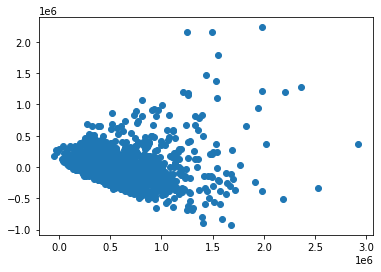

In [1002]:
plt.scatter(pred_1,y_valid-pred_1)

## Feature Engineering 

#### 1. Log Transformation of y

In [1003]:
import numpy as np
hp['log_price']=np.log(hp['price'])

In [1004]:
hp

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
1,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,14.022525
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,13.056224
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,12.644328
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,12.899220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,1490,0,2014,0,98144,47.5699,-122.288,1400,1230,12.969212
9757,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,2520,0,2014,0,98056,47.5137,-122.167,2520,6023,13.322337
9758,7936000429,20150326T000000,1010000.0,4,3.50,3510,7200,2.0,0,0,...,2600,910,2009,0,98136,47.5537,-122.398,2050,6200,13.825461
9759,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,12.904459


### LR Model-2

In [1005]:
Y = hp["log_price"]
X = hp[["bedrooms","bathrooms","waterfront","view","grade",
           "sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]

In [1006]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25, random_state=50)
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     1203.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:33:50   Log-Likelihood:                -2454.4
No. Observations:                7317   AIC:                             4929.
Df Residuals:                    7307   BIC:                             4998.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.2304      0.036    311.574      0.000      11.160      11.301
bedrooms         -0.0141      0.006     -2.505      0.012      -0.025      -0.003
bathrooms        -0.0093      0.008     -1.109      0.268      -0.026       0.007
waterfront        0.4307      0.048      8.956      0.000       0.336       0.525
view              0.0610      0.006     10.526      0.000       0.050       0.072
grade             0.1763      0.006     29.935      0.000       0.165       0.188
sqft_above        0.0002   1.03e-05     16.713      0.000       0.000       0.000
sqft_basement     0.0003   1.17e-05     23.282      0.000       0.000       0.000
sqft_living15   6.83e-05   9.58e-06      7.126      0.000    4.95e-05    8.71e-05
sqft_lot15    -5.851e-07   1.55e-07     -3.785      0.000   -8.88e-07   -2.82e-07
==============================================================================
Omnibus:                        2.454   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                2.444
Skew:                           0.028   Prob(JB):                        0.295
Kurtosis:                       2.930   Cond. No.                     3.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MAPE= 28.22


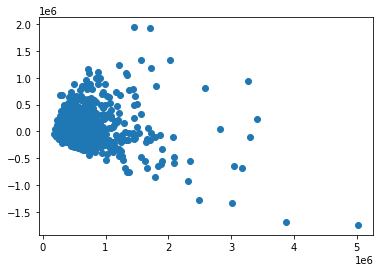

<AxesSubplot:ylabel='Density'>

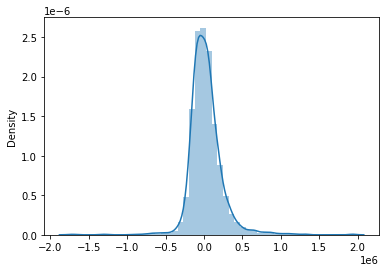

In [1007]:
X_valid=sm.add_constant(X_valid)
y_pred2=model.predict(X_valid)
y_pred2=np.exp(y_pred2)
print('MAPE=',round(np.mean(np.abs(y_pred2-np.exp(y_valid))/np.exp(y_valid))*100,2))
plt.scatter(y_pred2,np.exp(y_valid)-y_pred2)
plt.show()
sns.distplot(np.exp(y_valid)-y_pred2)

#### 2. Feature Transformation 

Zipcode is a categorical variable. 

We are giving a rank to zipcode as per the price in that area,
so as to make it more interpretable.

In [1008]:
a=hp[['price','zipcode']].groupby(['zipcode']).mean()
a=a.sort_values(by='price')
a=a.rank()

In [1009]:
hp=pd.merge(hp,a,on='zipcode')

In [1010]:
hp=hp.rename(columns={'price_x':'price'})
hp=hp.rename(columns={'price_y':'zip_rank_by_price'})

### LR Model-3

In [1011]:
Y = hp["log_price"]
X = hp[["bedrooms","bathrooms","waterfront","view","grade",'zip_rank_by_price',
           "sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]

In [1012]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25, random_state=50)
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     3372.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:33:50   Log-Likelihood:                 607.80
No. Observations:                7317   AIC:                            -1194.
Df Residuals:                    7306   BIC:                            -1118.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.3279      0.024    473.929      0.000      11.281      11.375
bedrooms              0.0117      0.004      3.167      0.002       0.004       0.019
bathrooms             0.0004      0.005      0.069      0.945      -0.010       0.011
waterfront            0.3999      0.032     12.651      0.000       0.338       0.462
view                  0.0786      0.004     20.243      0.000       0.071       0.086
grade                 0.0999      0.004     25.045      0.000       0.092       0.108
zip_rank_by_price     0.0145      0.000     96.383      0.000       0.014       0.015
sqft_above            0.0002   6.79e-06     27.238      0.000       0.000       0.000
sqft_basement         0.0002   7.64e-06     27.720      0.000       0.000       0.000
sqft_living15     -5.783e-06   6.37e-06     -0.908      0.364   -1.83e-05     6.7e-06
sqft_lot15         8.738e-08   9.86e-08      0.887      0.375   -1.06e-07    2.81e-07
==============================================================================
Omnibus:                      156.829   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.362
Skew:                           0.070   Prob(JB):                     1.50e-73
Kurtosis:                       4.039   Cond. No.                     3.66e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MAPE= 17.81


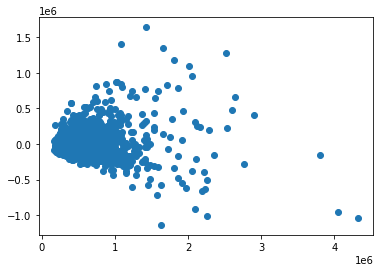

<AxesSubplot:ylabel='Density'>

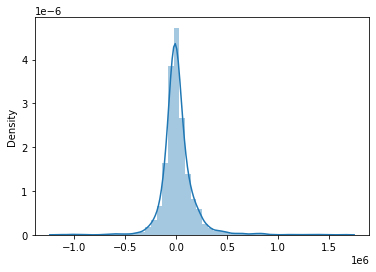

In [1013]:
X_valid=sm.add_constant(X_valid)
y_pred2=model.predict(X_valid)
y_pred2=np.exp(y_pred2)
print('MAPE=',round(np.mean(np.abs(y_pred2-np.exp(y_valid))/np.exp(y_valid))*100,2))
plt.scatter(y_pred2,np.exp(y_valid)-y_pred2)
plt.show()
sns.distplot(np.exp(y_valid)-y_pred2)

#### 3. Feature Transformation of of year built

In [1026]:
hp_2=hp.copy()

In [1028]:
a=np.array(2015)
for i in hp_2.date[1:]:
    a=np.append(a,int(i[:4]))
a=pd.DataFrame(a)
a

,0
0,2015
1,2014
2,2015
3,2015
4,2015
...,...
9751,2014
9752,2014
9753,2014
9754,2014


In [1029]:
b=a[0]-hp_2['yr_built']
b

0        50
1        64
2        74
3        99
4       101
       ... 
9751     13
9752     35
9753      9
9754     27
9755      1
Length: 9756, dtype: int64

In [1030]:
hp_2['age_of_house']=b

In [1031]:
hp_2=hp_2.drop(['yr_built'],axis=1)

### LR Model-4

In [1032]:
Y = hp_2["log_price"]
X = hp_2[["bedrooms","bathrooms","waterfront","view","grade",'zip_rank_by_price','age_of_house',
           "sqft_above","sqft_basement","sqft_living15","sqft_lot15"]]

In [1033]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25, random_state=50)
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     3434.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:40:17   Log-Likelihood:                 953.18
No. Observations:                7317   AIC:                            -1882.
Df Residuals:                    7305   BIC:                            -1800.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.9540      0.027    410.163      0.000      10.902      11.006
bedrooms              0.0038      0.004      1.085      0.278      -0.003       0.011
bathrooms             0.0603      0.006     10.699      0.000       0.049       0.071
waterfront            0.3980      0.030     13.199      0.000       0.339       0.457
view                  0.0634      0.004     16.926      0.000       0.056       0.071
grade                 0.1268      0.004     32.220      0.000       0.119       0.134
zip_rank_by_price     0.0135      0.000     90.555      0.000       0.013       0.014
age_of_house          0.0030      0.000     26.893      0.000       0.003       0.003
sqft_above            0.0002   6.52e-06     25.225      0.000       0.000       0.000
sqft_basement         0.0002   7.57e-06     20.658      0.000       0.000       0.000
sqft_living15      8.937e-06    6.1e-06      1.465      0.143   -3.02e-06    2.09e-05
sqft_lot15         1.587e-07   9.41e-08      1.687      0.092   -2.57e-08    3.43e-07
==============================================================================
Omnibus:                      224.526   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.723
Skew:                          -0.120   Prob(JB):                    1.16e-119
Kurtosis:                       4.319   Cond. No.                     3.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MAPE= 17.06


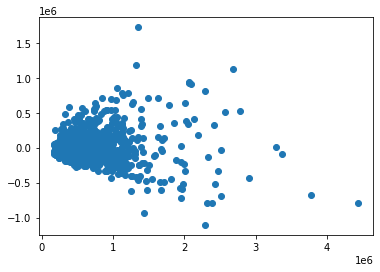

<AxesSubplot:ylabel='Density'>

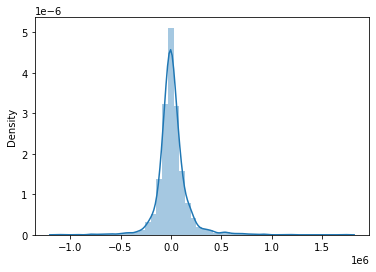

In [1034]:
X_valid=sm.add_constant(X_valid)
y_pred2=model.predict(X_valid)
y_pred2=np.exp(y_pred2)
print('MAPE=',round(np.mean(np.abs(y_pred2-np.exp(y_valid))/np.exp(y_valid))*100,2))
plt.scatter(y_pred2,np.exp(y_valid)-y_pred2)
plt.show()
sns.distplot(np.exp(y_valid)-y_pred2)

#### 4. Making information more relevant 

Sqft areas lot and living will be relevant just before they are sold.

There is no point in considering 2014 area for a house sold in 2015

when there is a change in 2015 

So creating a column that has only relevant areas 

In [1035]:
y=hp_2.price

In [1036]:
x=hp_2.drop(['price'],axis=1)
x

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,zip_rank_by_price,age_of_house
0,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,910,0,98136,47.5208,-122.393,1360,5000,13.311329,41.0,50
1,9169600135,20141027T000000,3,1.50,1350,6000,1.0,0,2,3,...,450,0,98136,47.5275,-122.391,1730,6012,13.171154,41.0,64
2,9238901420,20150202T000000,3,1.00,1190,5100,1.0,0,0,4,...,160,0,98136,47.5346,-122.385,1690,5100,12.999065,41.0,74
3,2490200320,20150320T000000,3,1.75,1680,6200,1.5,0,0,3,...,0,0,98136,47.5338,-122.384,1680,5100,13.208541,41.0,99
4,2349300060,20150212T000000,4,2.00,1920,4822,1.0,0,0,2,...,1000,0,98136,47.5507,-122.381,1120,4822,12.206073,41.0,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,20140708T000000,4,5.25,6500,14986,2.0,0,0,3,...,1320,0,98039,47.6304,-122.236,2270,8119,14.715672,70.0,13
9752,5427100150,20140626T000000,4,2.25,3250,16684,2.0,0,0,3,...,0,0,98039,47.6334,-122.229,2890,16927,14.159100,70.0,35
9753,3625049042,20141011T000000,5,6.00,5490,19897,2.0,0,0,3,...,0,0,98039,47.6165,-122.236,2910,17600,15.107494,70.0,9
9754,2525049113,20140725T000000,4,3.50,4065,18713,2.0,0,0,4,...,0,0,98039,47.6209,-122.237,3070,18713,14.483340,70.0,27


In [1037]:
c=[]
d=[]
j=0
for i in x.date:
    if i.startswith('2014'):
        c.append(x['sqft_living'][j])
        d.append(x['sqft_lot'][j])
    if i.startswith('2015'):
        c.append(x['sqft_living15'][j])
        d.append(x['sqft_lot15'][j])
    j+=1

In [1038]:
c=pd.DataFrame(c)
d=pd.DataFrame(d)
hp_2['sqliv_relevant']=c
hp_2['sqlot_relevant']=d

In [1039]:
hp_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,zip_rank_by_price,age_of_house,sqliv_relevant,sqlot_relevant
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,13.311329,41.0,50,1960,5000
1,9169600135,20141027T000000,525000.0,3,1.50,1350,6000,1.0,0,2,...,98136,47.5275,-122.391,1730,6012,13.171154,41.0,64,1350,6000
2,9238901420,20150202T000000,442000.0,3,1.00,1190,5100,1.0,0,0,...,98136,47.5346,-122.385,1690,5100,12.999065,41.0,74,1690,5100
3,2490200320,20150320T000000,545000.0,3,1.75,1680,6200,1.5,0,0,...,98136,47.5338,-122.384,1680,5100,13.208541,41.0,99,1680,5100
4,2349300060,20150212T000000,200000.0,4,2.00,1920,4822,1.0,0,0,...,98136,47.5507,-122.381,1120,4822,12.206073,41.0,101,1120,4822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,20140708T000000,2460000.0,4,5.25,6500,14986,2.0,0,0,...,98039,47.6304,-122.236,2270,8119,14.715672,70.0,13,6500,14986
9752,5427100150,20140626T000000,1410000.0,4,2.25,3250,16684,2.0,0,0,...,98039,47.6334,-122.229,2890,16927,14.159100,70.0,35,3250,16684
9753,3625049042,20141011T000000,3640000.0,5,6.00,5490,19897,2.0,0,0,...,98039,47.6165,-122.236,2910,17600,15.107494,70.0,9,5490,19897
9754,2525049113,20140725T000000,1950000.0,4,3.50,4065,18713,2.0,0,0,...,98039,47.6209,-122.237,3070,18713,14.483340,70.0,27,4065,18713


In [1040]:
# now that we got relevant areas, we are dropping the area columns 

In [1041]:
hp_3=hp_2.drop(['sqft_living','sqft_living15','sqft_lot','sqft_lot15'],axis=1)

### LR Model-5

In [1042]:
Y = hp_3["log_price"]
X = hp_3[["bedrooms","bathrooms","waterfront","view","grade",'zip_rank_by_price','age_of_house',
           "sqft_above","sqft_basement","sqliv_relevant","sqlot_relevant"]]

In [1043]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25, random_state=50)
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     3443.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:40:36   Log-Likelihood:                 960.40
No. Observations:                7317   AIC:                            -1897.
Df Residuals:                    7305   BIC:                            -1814.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.9512      0.027    411.216      0.000      10.899      11.003
bedrooms              0.0047      0.004      1.338      0.181      -0.002       0.012
bathrooms             0.0600      0.006     10.725      0.000       0.049       0.071
waterfront            0.3966      0.030     13.167      0.000       0.338       0.456
view                  0.0638      0.004     17.177      0.000       0.057       0.071
grade                 0.1285      0.004     33.417      0.000       0.121       0.136
zip_rank_by_price     0.0136      0.000     91.869      0.000       0.013       0.014
age_of_house          0.0030      0.000     26.906      0.000       0.003       0.003
sqft_above            0.0002   9.01e-06     18.838      0.000       0.000       0.000
sqft_basement         0.0002   9.74e-06     16.590      0.000       0.000       0.000
sqliv_relevant    -4.963e-06   8.12e-06     -0.611      0.541   -2.09e-05    1.09e-05
sqlot_relevant     3.237e-07    7.3e-08      4.434      0.000    1.81e-07    4.67e-07
==============================================================================
Omnibus:                      227.440   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.594
Skew:                          -0.133   Prob(JB):                    1.23e-119
Kurtosis:                       4.313   Cond. No.                     4.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MAPE= 17.08


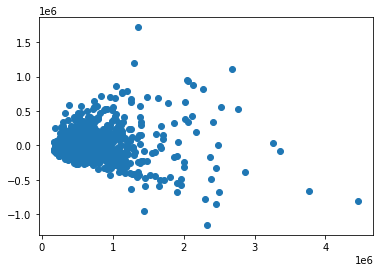

<AxesSubplot:ylabel='Density'>

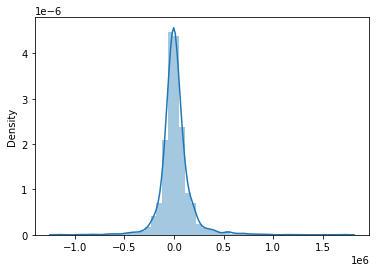

In [1044]:
X_valid=sm.add_constant(X_valid)
y_pred2=model.predict(X_valid)
y_pred2=np.exp(y_pred2)
print('MAPE=',round(np.mean(np.abs(y_pred2-np.exp(y_valid))/np.exp(y_valid))*100,2))
plt.scatter(y_pred2,np.exp(y_valid)-y_pred2)
plt.show()
sns.distplot(np.exp(y_valid)-y_pred2)

#### 5. Feature Transformation for year renovated 

In [1045]:
hp_3.yr_renovated.iloc[1403] = 0 
hp_3.yr_renovated.iloc[7538] = 0 
hp_3.yr_renovated.iloc[8826] = 0
hp_3
# We saw that only 4 houses are there which are renovated after being sold 
# So taking them as not renovated 

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,sqft_basement,yr_renovated,zipcode,lat,long,log_price,zip_rank_by_price,age_of_house,sqliv_relevant,sqlot_relevant
0,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,0,5,7,...,910,0,98136,47.5208,-122.393,13.311329,41.0,50,1960,5000
1,9169600135,20141027T000000,525000.0,3,1.50,1.0,0,2,3,7,...,450,0,98136,47.5275,-122.391,13.171154,41.0,64,1350,6000
2,9238901420,20150202T000000,442000.0,3,1.00,1.0,0,0,4,7,...,160,0,98136,47.5346,-122.385,12.999065,41.0,74,1690,5100
3,2490200320,20150320T000000,545000.0,3,1.75,1.5,0,0,3,7,...,0,0,98136,47.5338,-122.384,13.208541,41.0,99,1680,5100
4,2349300060,20150212T000000,200000.0,4,2.00,1.0,0,0,2,6,...,1000,0,98136,47.5507,-122.381,12.206073,41.0,101,1120,4822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,20140708T000000,2460000.0,4,5.25,2.0,0,0,3,11,...,1320,0,98039,47.6304,-122.236,14.715672,70.0,13,6500,14986
9752,5427100150,20140626T000000,1410000.0,4,2.25,2.0,0,0,3,9,...,0,0,98039,47.6334,-122.229,14.159100,70.0,35,3250,16684
9753,3625049042,20141011T000000,3640000.0,5,6.00,2.0,0,0,3,12,...,0,0,98039,47.6165,-122.236,15.107494,70.0,9,5490,19897
9754,2525049113,20140725T000000,1950000.0,4,3.50,2.0,0,0,4,10,...,0,0,98039,47.6209,-122.237,14.483340,70.0,27,4065,18713


In [1046]:
for i in  range(len(hp)):
    if hp_3.yr_renovated.iloc[i]>0:
        hp_3.yr_renovated.iloc[i]=1

In [1047]:
hp_3[hp_3.yr_renovated>0]

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,sqft_basement,yr_renovated,zipcode,lat,long,log_price,zip_rank_by_price,age_of_house,sqliv_relevant,sqlot_relevant
19,9238900855,20150313T000000,700000.0,2,1.00,1.0,0,3,3,7,...,0,1,98136,47.5333,-122.388,13.458836,41.0,89,1760,5228
25,2815600215,20141118T000000,462500.0,2,2.00,2.0,0,0,3,7,...,0,1,98136,47.5510,-122.395,13.044402,41.0,66,1540,7290
28,2490200165,20140623T000000,500000.0,3,1.00,2.0,0,0,3,8,...,0,1,98136,47.5349,-122.384,13.122363,41.0,103,1150,5100
31,2484200080,20140729T000000,731100.0,3,2.50,1.0,0,0,3,8,...,900,1,98136,47.5245,-122.384,13.502306,41.0,61,2060,8778
50,7934000145,20141201T000000,450000.0,4,2.75,2.0,0,0,3,7,...,860,1,98136,47.5563,-122.393,13.017003,41.0,103,2900,6400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9725,3528900086,20140508T000000,1310000.0,5,3.25,1.5,0,0,5,10,...,890,1,98109,47.6421,-122.350,14.085538,65.0,82,2800,3200
9728,2652501513,20140813T000000,539950.0,3,2.00,1.5,0,0,3,7,...,0,1,98109,47.6398,-122.356,13.199232,65.0,104,1560,3200
9743,5425700205,20140520T000000,1800000.0,4,3.50,1.0,0,0,3,9,...,1910,1,98039,47.6338,-122.232,14.403297,70.0,52,4460,16953
9745,2425049107,20150305T000000,1950000.0,4,3.75,1.0,0,0,3,9,...,1020,1,98039,47.6390,-122.236,14.483340,70.0,52,3930,21420


In [1048]:
for i in  range(len(hp)):
    if hp_3.sqft_basement.iloc[i]>0:
        hp_3.sqft_basement.iloc[i]=1

### LR Model-6

In [1049]:
Y = hp_3["log_price"]
X = hp_3[["bedrooms","bathrooms","waterfront","view","grade",'zip_rank_by_price','age_of_house',
           "sqft_above","sqft_basement","sqliv_relevant","sqlot_relevant",'yr_renovated']]

In [1050]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25, random_state=50)

In [1051]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     3163.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:40:41   Log-Likelihood:                 967.49
No. Observations:                7317   AIC:                            -1909.
Df Residuals:                    7304   BIC:                            -1819.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.9154      0.026    417.854      0.000      10.864      10.967
bedrooms              0.0108      0.003      3.129      0.002       0.004       0.018
bathrooms             0.0572      0.006     10.122      0.000       0.046       0.068
waterfront            0.3876      0.030     12.867      0.000       0.329       0.447
view                  0.0676      0.004     18.283      0.000       0.060       0.075
grade                 0.1270      0.004     32.970      0.000       0.119       0.135
zip_rank_by_price     0.0134      0.000     91.127      0.000       0.013       0.014
age_of_house          0.0029      0.000     25.616      0.000       0.003       0.003
sqft_above            0.0002   8.22e-06     18.493      0.000       0.000       0.000
sqft_basement         0.1241      0.007     16.856      0.000       0.110       0.139
sqliv_relevant     2.697e-05   7.01e-06      3.849      0.000    1.32e-05    4.07e-05
sqlot_relevant     3.358e-07   7.29e-08      4.604      0.000    1.93e-07    4.79e-07
yr_renovated          0.0375      0.013      2.900      0.004       0.012       0.063
==============================================================================
Omnibus:                      219.751   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.734
Skew:                          -0.109   Prob(JB):                    1.71e-117
Kurtosis:                       4.310   Cond. No.                     4.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MAPE= 16.99


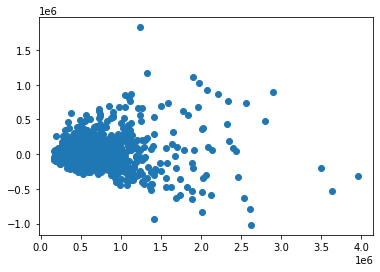

<AxesSubplot:ylabel='Density'>

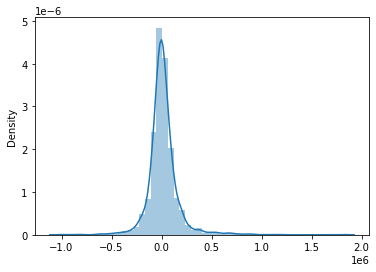

In [1052]:
X_valid=sm.add_constant(X_valid)
y_pred2=model.predict(X_valid)
y_pred2=np.exp(y_pred2)
print('MAPE=',round(np.mean(np.abs(y_pred2-np.exp(y_valid))/np.exp(y_valid))*100,2))
plt.scatter(y_pred2,np.exp(y_valid)-y_pred2)
plt.show()
sns.distplot(np.exp(y_valid)-y_pred2)

## Outlier treatment

<AxesSubplot:xlabel='log_price', ylabel='Density'>

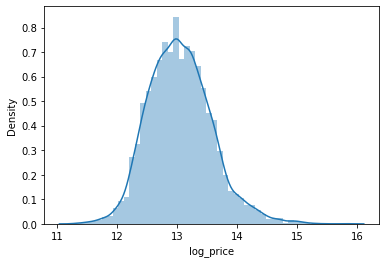

In [1053]:
sns.distplot(Y)

In [1054]:
upper_thresh,lower_thresh=(np.mean(Y)+3*np.var(Y),np.mean(Y)-3*np.var(Y))

In [1060]:
hp_3=hp_3.loc[hp_3.log_price<upper_thresh]
hp_3

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,sqft_basement,yr_renovated,zipcode,lat,long,log_price,zip_rank_by_price,age_of_house,sqliv_relevant,sqlot_relevant
0,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,0,5,7,...,1,0,98136,47.5208,-122.393,13.311329,41.0,50,1960,5000
1,9169600135,20141027T000000,525000.0,3,1.50,1.0,0,2,3,7,...,1,0,98136,47.5275,-122.391,13.171154,41.0,64,1350,6000
2,9238901420,20150202T000000,442000.0,3,1.00,1.0,0,0,4,7,...,1,0,98136,47.5346,-122.385,12.999065,41.0,74,1690,5100
3,2490200320,20150320T000000,545000.0,3,1.75,1.5,0,0,3,7,...,0,0,98136,47.5338,-122.384,13.208541,41.0,99,1680,5100
4,2349300060,20150212T000000,200000.0,4,2.00,1.0,0,0,2,6,...,1,0,98136,47.5507,-122.381,12.206073,41.0,101,1120,4822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9734,3528900771,20150331T000000,600000.0,3,3.25,2.0,0,0,3,8,...,1,0,98109,47.6397,-122.345,13.304685,65.0,7,1670,2594
9735,1972205633,20140723T000000,550000.0,3,2.00,2.5,0,0,3,9,...,1,0,98109,47.6472,-122.357,13.217674,65.0,7,1420,1369
9737,2210500019,20150324T000000,937500.0,3,1.00,1.0,0,0,4,7,...,0,0,98039,47.6187,-122.226,13.750972,70.0,61,2790,10800
9740,3262301610,20141118T000000,865000.0,3,1.50,1.0,0,0,4,8,...,0,0,98039,47.6354,-122.234,13.670485,70.0,59,1530,10827


### LR Model-7

In [1062]:
X=hp_3[['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_renovated', 'zip_rank_by_price', 'age_of_house',
       'sqliv_relevant', 'sqlot_relevant']]

In [1063]:
Y=hp_3.log_price

In [1064]:
X.columns

Index(['bedrooms', 'bathrooms', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_renovated', 'zip_rank_by_price', 'age_of_house',
       'sqliv_relevant', 'sqlot_relevant'],
      dtype='object')

In [1065]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable 
y, X = dmatrices('log_price ~ bedrooms+bathrooms+waterfront+view+grade+condition+sqft_basement+yr_renovated+zip_rank_by_price+age_of_house+sqliv_relevant+sqlot_relevant', data=pd.concat([X,Y],axis=1), return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
vif

,VIF,variable
0,139.211865,Intercept
1,1.590324,bedrooms
2,2.626503,bathrooms
3,1.101502,waterfront
4,1.185818,view
5,2.510604,grade
6,1.180138,condition
7,1.146476,sqft_basement
8,1.113481,yr_renovated
9,1.185163,zip_rank_by_price


In [1066]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25, random_state=50)
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1980.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:42:22   Log-Likelihood:                 962.18
No. Observations:                6883   AIC:                            -1898.
Df Residuals:                    6870   BIC:                            -1809.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.8228      0.030    358.863      0.000      10.764      10.882
bedrooms              0.0129      0.004      3.596      0.000       0.006       0.020
bathrooms             0.0864      0.006     14.874      0.000       0.075       0.098
waterfront            0.2598      0.046      5.626      0.000       0.169       0.350
view                  0.0483      0.004     11.398      0.000       0.040       0.057
grade                 0.1353      0.004     34.584      0.000       0.128       0.143
condition             0.0296      0.004      6.904      0.000       0.021       0.038
sqft_basement         0.0332      0.006      5.909      0.000       0.022       0.044
yr_renovated          0.0338      0.014      2.432      0.015       0.007       0.061
zip_rank_by_price     0.0131      0.000     86.070      0.000       0.013       0.013
age_of_house          0.0025      0.000     19.918      0.000       0.002       0.003
sqliv_relevant        0.0001   5.86e-06     20.069      0.000       0.000       0.000
sqlot_relevant     4.559e-07   7.87e-08      5.792      0.000    3.02e-07     6.1e-07
==============================================================================
Omnibus:                      250.501   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              602.814
Skew:                          -0.189   Prob(JB):                    1.26e-131
Kurtosis:                       4.400   Cond. No.                     6.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MAPE= 15.88


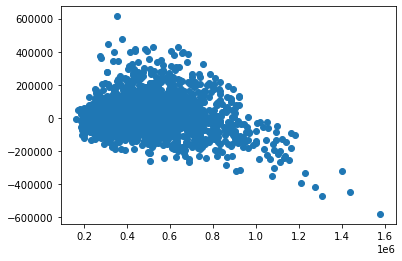

<AxesSubplot:ylabel='Density'>

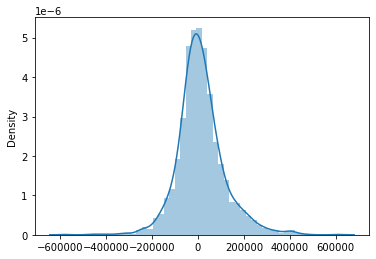

In [1067]:
X_valid=sm.add_constant(X_valid)
y_pred2=model.predict(X_valid)
y_pred2=np.exp(y_pred2)
print('MAPE=',round(np.mean(np.abs(y_pred2-np.exp(y_valid))/np.exp(y_valid))*100,2))
plt.scatter(y_pred2,np.exp(y_valid)-y_pred2)
plt.show()
sns.distplot(np.exp(y_valid)-y_pred2)

In [1088]:
min_score=100000
for i in [0.01]:   
    from sklearn import datasets
    from sklearn.linear_model import Lasso
    from sklearn.model_selection import train_test_split
    # Create training and test split
    #
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=50)
    #
    # Create an instance of Lasso Regression implementation
    #
    lasso = Lasso(alpha=i)
    #
    # Fit the Lasso model
    #
    lasso.fit(X_train, y_train)
    #
    # Create the model score
    X_valid=sm.add_constant(X_valid)
    y_pred2=lasso.predict(X_valid)
    y_pred2=np.exp(y_pred2)
    print('MAPE=',round(np.mean(np.abs(y_pred2-np.exp(y_valid))/np.exp(y_valid))*100,2))

        

MAPE= 16.04


In [1089]:
X.columns[lasso.coef_!=0]

Index(['bedrooms', 'bathrooms', 'view', 'grade', 'condition',
       'zip_rank_by_price', 'age_of_house', 'sqliv_relevant',
       'sqlot_relevant'],
      dtype='object')

### Using Dummies for Zipcode

In [1090]:
hp_5 = hp.drop("date",axis =1)

In [1091]:
hp_5

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price,zip_rank_by_price
0,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,41.0
1,9169600135,525000.0,3,1.50,1350,6000,1.0,0,2,3,...,450,1950,0,98136,47.5275,-122.391,1730,6012,13.171154,41.0
2,9238901420,442000.0,3,1.00,1190,5100,1.0,0,0,4,...,160,1941,0,98136,47.5346,-122.385,1690,5100,12.999065,41.0
3,2490200320,545000.0,3,1.75,1680,6200,1.5,0,0,3,...,0,1916,0,98136,47.5338,-122.384,1680,5100,13.208541,41.0
4,2349300060,200000.0,4,2.00,1920,4822,1.0,0,0,2,...,1000,1914,0,98136,47.5507,-122.381,1120,4822,12.206073,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9751,3262300555,2460000.0,4,5.25,6500,14986,2.0,0,0,3,...,1320,2001,0,98039,47.6304,-122.236,2270,8119,14.715672,70.0
9752,5427100150,1410000.0,4,2.25,3250,16684,2.0,0,0,3,...,0,1979,0,98039,47.6334,-122.229,2890,16927,14.159100,70.0
9753,3625049042,3640000.0,5,6.00,5490,19897,2.0,0,0,3,...,0,2005,0,98039,47.6165,-122.236,2910,17600,15.107494,70.0
9754,2525049113,1950000.0,4,3.50,4065,18713,2.0,0,0,4,...,0,1987,0,98039,47.6209,-122.237,3070,18713,14.483340,70.0


In [1092]:
hpdum = pd.get_dummies(X.zip_rank_by_price,drop_first = True)

In [1093]:
Xdum = pd.concat([X,hpdum],axis = 1)

In [1094]:
Xdum

,Intercept,bedrooms,bathrooms,waterfront,view,grade,condition,sqft_basement,yr_renovated,zip_rank_by_price,...,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0
0,1.0,4.0,3.00,0.0,0.0,7.0,5.0,1.0,0.0,41.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,3.0,1.50,0.0,2.0,7.0,3.0,1.0,0.0,41.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3.0,1.00,0.0,0.0,7.0,4.0,1.0,0.0,41.0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,3.0,1.75,0.0,0.0,7.0,3.0,0.0,0.0,41.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,4.0,2.00,0.0,0.0,6.0,2.0,1.0,0.0,41.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9734,1.0,3.0,3.25,0.0,0.0,8.0,3.0,1.0,0.0,65.0,...,0,0,0,0,1,0,0,0,0,0
9735,1.0,3.0,2.00,0.0,0.0,9.0,3.0,1.0,0.0,65.0,...,0,0,0,0,1,0,0,0,0,0
9737,1.0,3.0,1.00,0.0,0.0,7.0,4.0,0.0,0.0,70.0,...,0,0,0,0,0,0,0,0,0,1
9740,1.0,3.0,1.50,0.0,0.0,8.0,4.0,0.0,0.0,70.0,...,0,0,0,0,0,0,0,0,0,1


### LR Model-8

In [1095]:
Y=hp_3.log_price
Y

0       13.311329
1       13.171154
2       12.999065
3       13.208541
4       12.206073
          ...    
9734    13.304685
9735    13.217674
9737    13.750972
9740    13.670485
9742    13.576619
Name: log_price, Length: 9178, dtype: float64

In [1096]:
X=X.drop(['zip_rank_by_price'],axis=1)

In [1097]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size =0.25, random_state=50)
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     715.6
Date:                Sun, 19 Jun 2022   Prob (F-statistic):               0.00
Time:                        23:11:36   Log-Likelihood:                -1555.5
No. Observations:                6883   AIC:                             3135.
Df Residuals:                    6871   BIC:                             3217.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.4632      0.043    243.016      0.000      10.379      10.548
bedrooms          -0.0127      0.005     -2.451      0.014      -0.023      -0.003
bathrooms          0.1042      0.008     12.452      0.000       0.088       0.121
waterfront         0.2342      0.067      3.518      0.000       0.104       0.365
view               0.0265      0.006      4.351      0.000       0.015       0.038
grade              0.2330      0.005     43.181      0.000       0.222       0.244
condition          0.0223      0.006      3.611      0.000       0.010       0.034
sqft_basement      0.0663      0.008      8.189      0.000       0.050       0.082
yr_renovated       0.0043      0.020      0.217      0.828      -0.035       0.044
age_of_house       0.0050      0.000     28.179      0.000       0.005       0.005
sqliv_relevant     0.0001   8.45e-06     15.318      0.000       0.000       0.000
sqlot_relevant  1.156e-07   1.13e-07      1.020      0.308   -1.07e-07    3.38e-07
==============================================================================
Omnibus:                       51.639   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.635
Skew:                          -0.214   Prob(JB):                     3.72e-12
Kurtosis:                       3.032   Cond. No.                     6.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

MAPE= 25.24


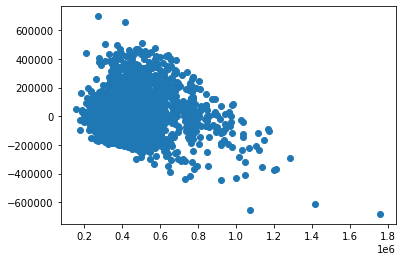

<AxesSubplot:ylabel='Density'>

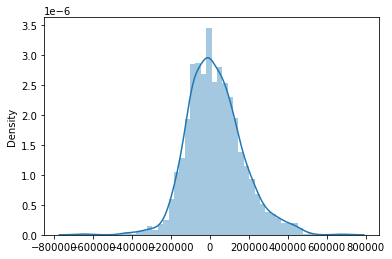

In [1098]:
X_valid=sm.add_constant(X_valid)
y_pred2=model.predict(X_valid)
y_pred2=np.exp(y_pred2)
print('MAPE=',round(np.mean(np.abs(y_pred2-np.exp(y_valid))/np.exp(y_valid))*100,2))
plt.scatter(y_pred2,np.exp(y_valid)-y_pred2)
plt.show()
sns.distplot(np.exp(y_valid)-y_pred2)